### Численные методы ЛР2 (решение нелинейных уравнений), задачи 2.1-2.3. 

### Якименко Александра (32 в списке группы). Выполняемые задачи, согласно приложению 2А: 2.1.2, 2.3.1, 2.9.1. В таблице к задаче 2.2 пять вариантов, значит мой - 2.2.2.

# Задача 2.1 (вариант 2) 
Даны два уравнения f(x)=0 и g(x)=0. 
Найти с точностью 10<sup>-10</sup> все корни уравнений,
содержащиеся на отрезке [a, b]. Для решения задачи использовать метод бисекции. Найти корни с помощью
встроенной функции.

## 1. Найти аналитическое решение уравнения f(x)=0.

$ f(x) = 0 $

$ \sin^2 x + \frac{7}{12}\sin x + \frac{1}{12} = 0 $

$ (\sin x + \frac{1}{3})(\sin x + \frac{1}{4}) = 0 $

$ \sin x_1 = -\frac{1}{3} \Rightarrow x_1 = \arcsin(-\frac{1}{3}) \approx  -0.3398369095$ 

$ \sin x_1 = -\frac{1}{4} \Rightarrow x_1 = \arcsin(-\frac{1}{4}) \approx  -0.2526802551$

## Найти аналитическое решение уравнения g(x)=0.

$ g(x) = 0 $

$ \sin^2 x + \frac{2}{3}\sin x + \frac{1}{9} = 0 $

$ (\sin x + \frac{1}{3})^2 = 0 $

$ \sin x_{1,2} = -\frac{1}{3} \Rightarrow x_{1,2} = \arcsin(-\frac{1}{3}) \approx  -0.3398369095$ 

In [1]:
import numpy as np

def f(x):
    return (np.sin(x))**2+7/12*np.sin(x)+1/12

def g(x):
    return (np.sin(x))**2+2/3*np.sin(x)+1/9
def y0(x):
    return x*0

epsilon = 1e-10

## 2. Графическая локализация корней f(x)=0.

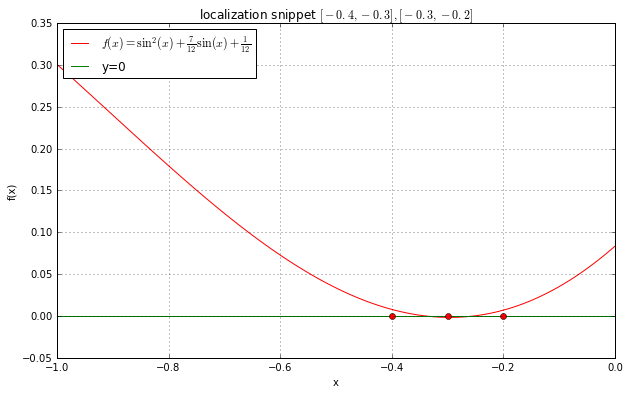

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import pi

x = np.linspace(-1, 0, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x), 'r', label=r"$f(x) = \sin^2(x)+\frac{7}{12}\sin(x)+\frac{1}{12}$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([-0.4, -0.3, -0.2], [0, 0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.set_title(r"localization snippet $[-0.4,-0.3],[-0.3,-0.2]$")
ax.legend(loc=2);
plt.show()

## Графическая локализация корней g(x)=0.

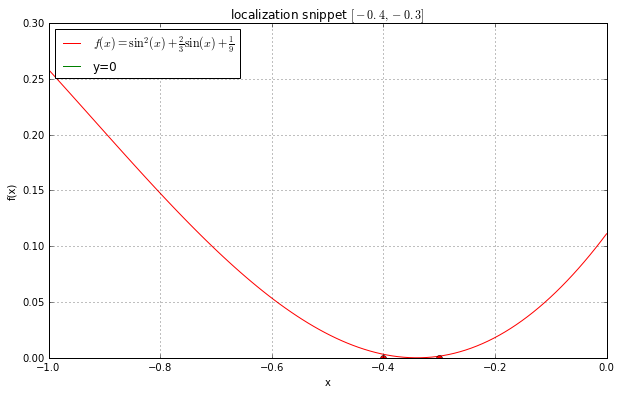

In [3]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, g(x), 'r', label=r"$f(x) = \sin^2(x)+\frac{2}{3}\sin(x)+\frac{1}{9}$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([-0.4, -0.3], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.set_title(r"localization snippet $[-0.4,-0.3]$")
ax.legend(loc=2);
plt.show()

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import pi

x = np.linspace(-1, 0, 100)
plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'r', label=r"$f(x) = \sin^2(x)+\frac{7}{12}\sin(x)+\frac{1}{12}$")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.title(r"отрезки локализации $[-1,arcsin(-\frac{7}{24})],[arcsin(-\frac{7}{24}),0]$")
plt.legend(loc=2);
plt.show()

plt.figure(figsize=(10,6))
plt.plot(x, g(x), 'g', label=r"$f(x) = \sin^2(x)+\frac{2}{3}\sin(x)+\frac{1}{9}$")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.title(r"отрезки локализации $[-1,arcsin(-\frac{1}{3})],[arcsin(-\frac{1}{3}),0]$")
plt.legend(loc=2);
plt.show()

## 3. Метод бисекции для f(x)=0 с заданной точностью (по приложенному алгоритму).

In [4]:
def bisec(f, a, b, e):
    an, bn = a, b
    k = 0
    while (bn - an)>2*e:
        xn = (an+bn)/2
        fa = f(an)
        fb = f(bn)
        fxn = f(xn)
        if fa*fxn<=0:
            bn = xn
        else:
            an = xn
        k +=1  
    xn=(an+bn)/2
    return (xn, k)

In [5]:
f_root1 = bisec(f, -0.4, -0.3, epsilon)
print("первый корень f(x)=0:", f_root1[0], "\nколичество итераций:", f_root1[1])

первый корень f(x)=0: -0.3398369095288216 
количество итераций: 29


In [6]:
f_root2 = bisec(f, -0.3, -0.2, epsilon)
print("второй корень f(x)=0:", f_root2[0], "\nколичество итераций:", f_root2[1])

второй корень f(x)=0: -0.2526802551932633 
количество итераций: 29


## Метод бисекции для g(x)=0 с заданной точностью.

In [7]:
g_root = bisec(g, -0.2, -0.3, epsilon)
print("корень g(x)=0:", g_root[0], "\nколичество итераций:", g_root[1])

корень g(x)=0: -0.25 
количество итераций: 0


## 4. Найти корни с заданной точностью, используя встроенную функцию.

In [9]:
from scipy.optimize import fsolve
f_root1_bib = fsolve(f, -1, xtol=1e-10)[0]
f_root2_bib = fsolve(f, 0, xtol=1e-10)[0]
print("первый корень f(x)=0:", f_root1_bib)
print("второй корень f(x)=0:", f_root2_bib)
print("разница для первого корня ", abs(f_root1[0]-f_root1_bib))
print("разница для второго корня ", abs(f_root2[0]-f_root2_bib))

первый корень f(x)=0: -0.339836909454
второй корень f(x)=0: -0.252680255142
разница для первого корня  7.46993578105e-11
разница для второго корня  5.11848341489e-11


In [10]:
g_root_bib = fsolve(g, 0, xtol=1e-10)[0]
print("корень g(x)=0:", )
print("разница для корня ", abs(g_root[0]-g_root_bib))

корень g(x)=0:
разница для корня  0.0898369109671


## Вывод.
Решение для уравнения f(x) = 0 с помощью метода бисекции совпало с аналитическим решением и решением в спомощью втроенной функции. Решение g(x) = 0 на первом же шаге заканчивается, т.к. метод не подходит для поиска корней четной степени.

# Задача 2.2.
Найти указанный в варианте корень уравнения f(x)=0 с точностью 10<sup>-6</sup>, двумя способами.

* Использовать метод бисекции. Предварительно определить отрезок локализации [a, b].
* Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять середину
отрезка локализации из п. а).
* Сравнить число итераций в п. a), b).

$ f(x) = xe^x-x-1$, найти положительный корень

In [12]:
def f(x):
    return x*np.exp(x)-x-1
def dfdx(x):
    return (x+1)*np.exp(x)-1
def y0(x):
    return x*0

epsilon = 1e-6

## Определим отрезок локализации f(x)=0.

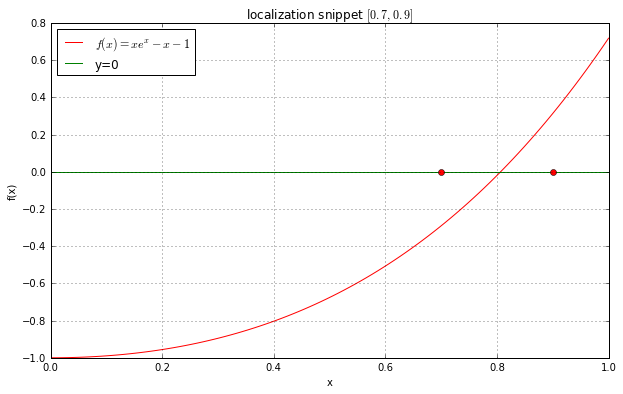

In [13]:
# нам нужны положительные корни
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x), 'r', label=r"$f(x) = x e^x-x-1$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([0.7, 0.9], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.set_title(r"localization snippet $[0.7,0.9]$")
ax.legend(loc=2);
plt.show()

## Решение с помощью метода бисекции

In [14]:
bisec_root = bisec(f, 0.7, 0.9, epsilon)
print("положительный корень f(x)=0, метод бисекции:", bisec_root[0], "\nколичество итераций:", bisec_root[1])

положительный корень f(x)=0, метод бисекции: 0.8064659118652342 
количество итераций: 17


## Решение с помощью метода Ньютона

$ f(x) = xe^x-x-1$, найти положительный корень

$\frac{df}{dx}=e^x+xe^x-1$

$x^{n+1}=x^n - \frac{f(x^n)}{f'(x^n)}$

критерий остановки $|x^n-x^{n-1}|<\varepsilon$

In [15]:
def newton(f, dfdx, x0, e):
    k = 1
    x_prev = x0
    x_curr = x_prev - f(x_prev)/dfdx(x_prev)
    while abs(x_curr-x_prev) > e:
        x_prev = x_curr
        x_curr = x_prev - f(x_prev)/dfdx(x_prev)
        k+=1
    return (x_curr, k)

In [16]:
newton_root = newton(f, dfdx, (0.7+0.9)/2, epsilon)
print("положительный корень f(x)=0, метод Ньютона:", newton_root[0], "\nколичество итераций:", newton_root[1])

положительный корень f(x)=0, метод Ньютона: 0.806465994236 
количество итераций: 3


In [17]:
print("разница для корня ", abs(bisec_root[0]-newton_root[0]))

разница для корня  8.23710926134e-08


## Вывод.
Число итераций в решении методом Ньютона меньше, чем в решении методом бисекции.

# Задача 2.3

Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon = 10^{-5}$, используя метод простой итерации. К виду $x = \varphi(x)$, удобному для итераций, уравнение $f(x)=0$ привести двумя способами.

a) Преобразовать уравнение к виду $x=x-\alpha f(x)$, где $\alpha=2/(M+m)$, $0<m\le f'(x) \le M$ а $x$ принадлежит отрезку локализации $[a, b]$.

b) Любым другим преобразованием уравнения. Проверить достаточное условие сходимости метода.

Использовать критерий окончания итерационного процесса вида $|x^n-x^{n-1}|<\frac{1-q}{q}\varepsilon$, где в п. a) $q=(M-m)/(M+m)$, в п. b)$q=\max_{x\in[a,b]}|\varphi'(x)|$.

Сравнить число итераций и значения величины q в п. a), b).

$f(x) = \sin x + 2x^2 +4x$

$\frac{df}{dx}=\cos x +4x +4$

In [18]:
def f(x):
    return np.sin(x) + 2*x**2 + 4*x

def dfdx(x):
    return np.cos(x) +4*x + 4

def phi(x, a, f):
    return x-a*f(x)

epsilon = 1e-5

## Локализация корней f(x)=0

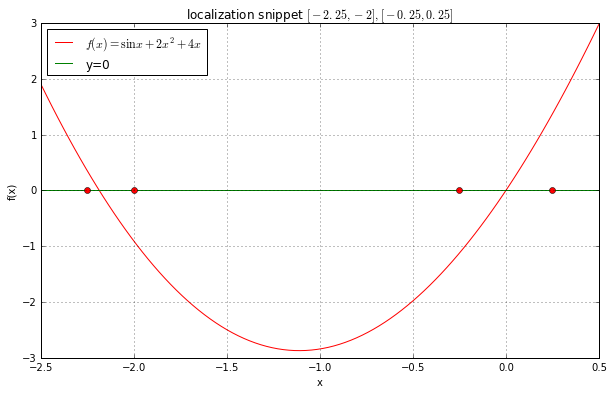

In [19]:
x = np.linspace(-2.5, 0.5, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x), 'r', label=r"$f(x) = \sin x + 2x^2 +4x$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([-2.25, -2, -0.25, 0.25], [0, 0, 0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.set_title(r"localization snippet $[-2.25,-2],[-0.25, 0.25]$")
ax.legend(loc=2);
plt.show()

## Метод простых итераций

In [20]:
def simple_iter(f, phi, x0, q, a, e):
    k = 1
    x_prev = x0
    x_curr = phi(x_prev, a, f)
    while abs(x_curr - x_prev) > abs((1-q)/q)*e:
        x_prev = x_curr
        x_curr = phi(x_prev, a, f)
        k+=1
    return (x_curr, k)

## Способ а)

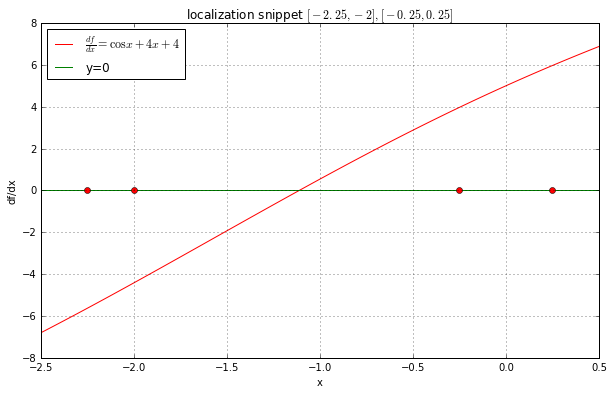

In [21]:
x = np.linspace(-2.5, 0.5, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, dfdx(x), 'r', label=r"$\frac{df}{dx}=\cos x +4x +4$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([-2.25, -2, -0.25, 0.25], [0, 0, 0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('df/dx')
ax.grid()
ax.set_title(r"localization snippet $[-2.25,-2],[-0.25, 0.25]$")
ax.legend(loc=2);
plt.show()

Производная монотонно возрпстает на всех отрезках локализации, $0<m\le f'(x) \le M$.

In [22]:
m1, m2 = dfdx(-2.25), dfdx(-0.25)
M1, M2 = dfdx(-2), dfdx(0.25)
a1, a2 = 2/(m1 + M1), 2/(m2 + M2)
q1, q2 = (M1-m1)/(M1+m1), (M2-m2)/(M2+m2)

In [23]:
print("значения q1:", q1, "\nзначение q2:", q2)

значения q1: -0.120667873062 
значение q2: 0.201251283003


In [24]:
iter_root1 = simple_iter(f, phi, (-2.25-2)/2, q1, a1, epsilon)
print("первый корень f(x)=0, метод простых итераций:", iter_root1[0], "\nколичество итераций:", iter_root1[1])

первый корень f(x)=0, метод простых итераций: -2.18665036794 
количество итераций: 4


In [25]:
iter_root2 = simple_iter(f, phi, (-0.25+0.25)/2, q2, a2, epsilon)
print("второй корень f(x)=0, метод простых итераций:", iter_root2[0], "\nколичество итераций:", iter_root2[1])

второй корень f(x)=0, метод простых итераций: 0.0 
количество итераций: 1


## Способ б)

$x=\varphi(x)$

$x=x-\frac{f(x)}{f'(x)}$

$q=\max\limits_{x\in[a, b]}|\varphi'(x)|=\max\limits_{x\in[a, b]}|(x-\frac{f(x)}{f'(x)})'|=\max\limits_{x\in[a, b]}|\frac{f(x)f''(x)}{f'^2(x)}|$

$\frac{df}{dx}=\cos x +4x +4$

$\frac{d^2f}{dx^2}=4-\sin x$

In [26]:
def dfdx2(x):
    return 4-np.sin(x)

In [27]:
def f_dfdx(x):
    return (np.sin(x) + 2*x**2 + 4*x)/(np.cos(x) +4*x + 4)

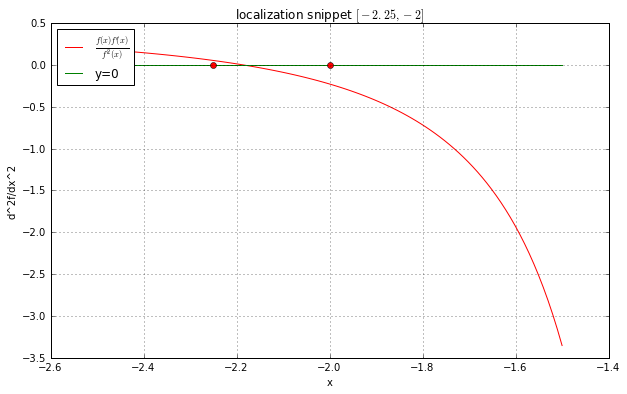

In [28]:
x = np.linspace(-2.5, -1.5, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x)*dfdx2(x)/(dfdx(x)**2), 'r', label=r"$\frac{f(x)f''(x)}{f'^2(x)}$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([-2.25, -2], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('d^2f/dx^2')
ax.grid()
ax.set_title(r"localization snippet $[-2.25, -2]$")
ax.legend(loc=2);
plt.show()

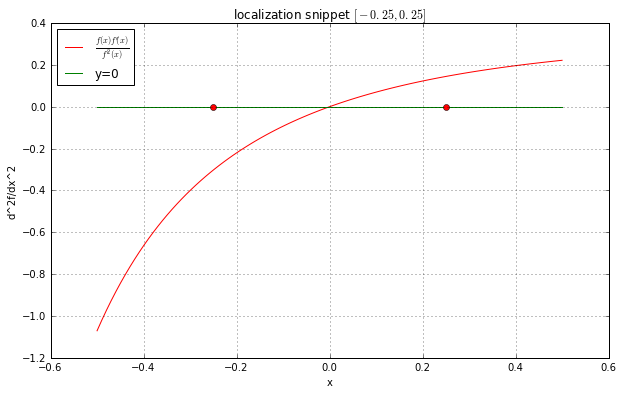

In [85]:
x = np.linspace(-0.5, 0.5, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x)*dfdx2(x)/(dfdx(x)**2), 'r', label=r"$\frac{f(x)f''(x)}{f'^2(x)}$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([-0.25, 0.25], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('d^2f/dx^2')
ax.grid()
ax.set_title(r"localization snippet $[-0.25, 0.25]$")
ax.legend(loc=2);
plt.show()

условие $q=\max_\limits{[a,b]}|\varphi'(x)|<1$ выполняется

In [29]:
q3 = abs(f(-2)*dfdx2(-2)/(dfdx(-2)**2))
q4 = abs(f(-0.25)*dfdx2(-0.25)/(dfdx(-0.25)**2))

In [30]:
print("значения q3:", q3, "\nзначение q4:", q4)

значения q3: 0.228896048839 
значение q4: 0.302642367616


In [31]:
iter_new_root1 = simple_iter(f_dfdx, phi, (-2.25-2)/2, q3, 1, epsilon)
print("первый корень f(x)=0, метод простых итераций:", iter_new_root1[0], "\nколичество итераций:", iter_new_root1[1])

первый корень f(x)=0, метод простых итераций: -2.18665078327 
количество итераций: 3


In [32]:
iter_new_root2 = simple_iter(f_dfdx, phi, (-0.25+0.25)/2, q4, 1, epsilon)
print("второй корень f(x)=0, метод простых итераций:", iter_new_root2[0], "\nколичество итераций:", iter_new_root2[1])

первый корень f(x)=0, метод простых итераций: 0.0 
количество итераций: 1


In [34]:
print("разница для корня ", abs(iter_root1[0]-iter_new_root1[0]))

разница для корня  4.15331876003e-07


In [35]:
print("разница для корня ", abs(iter_root2[0]-iter_new_root2[0]))

разница для корня  0.0
